In [2]:
from importlib import reload

import numpy as np
from matplotlib import pyplot as plt

import spectrum_painting as sp
import spectrum_painting_data as sp_data
import spectrum_painting_plotting as sp_plot

In [7]:
# Reload spectrum painting module in case the code changed
# and you want what is executed to be what you wrote.
reload(sp_data)
reload(sp_plot)
reload(sp)

spectrograms = sp_data.load_spectrograms(data_dir="data/numpy",
                                         classes=["Z", "B", "W", "BW", "ZB", "ZW", "ZBW"],
                                         snr_list=[-100, 0, 10, 20, 30],
                                         # 20 MHz
                                         sample_rate=20000000,
                                         count=500000)


# spectrograms_test = sp_data.load_spectrograms(data_dir="data/numpy-test",
#                                          # classes=["Z", "B", "W", "BW", "ZB", "ZW", "ZBW"],
#                                          classes=["ZBW"],
#                                          snr_list=[30],
#                                          # 20 MHz
#                                          sample_rate=20000000,
#                                          count=500000)

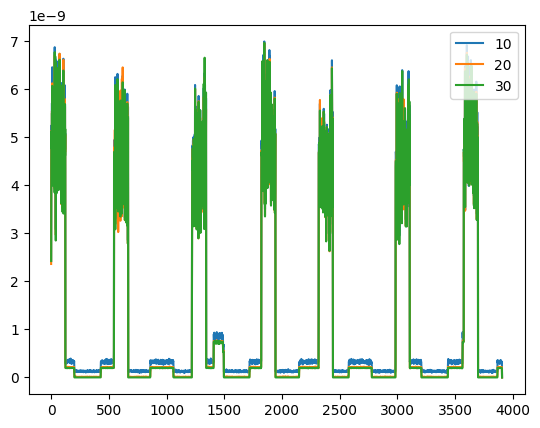

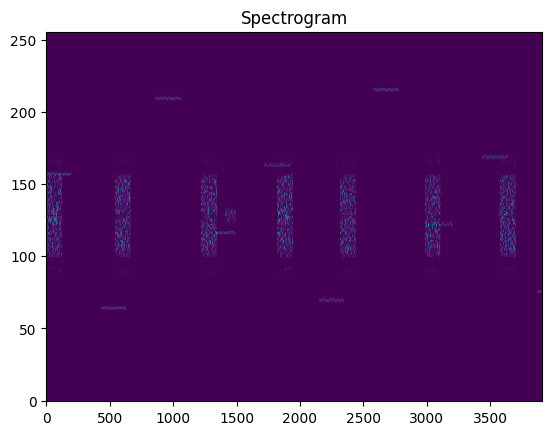

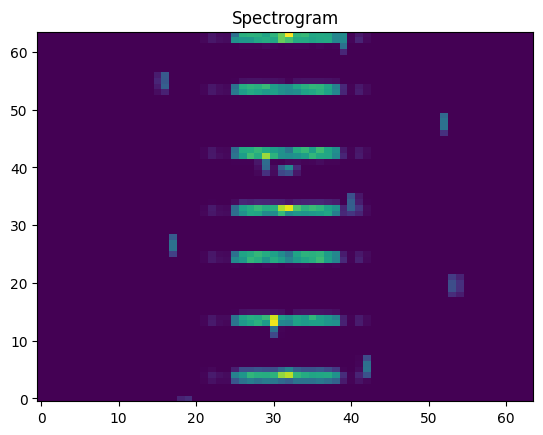

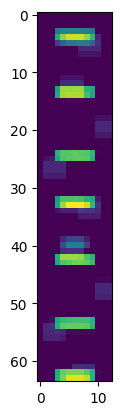

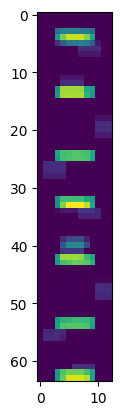

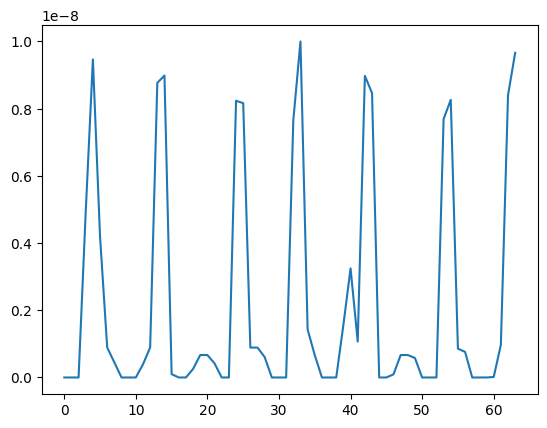

In [12]:
reload(sp_data)
reload(sp_plot)
reload(sp)

# spec = spectrograms["ZBW"][0]
# spec_test = spectrograms_test["ZBW"][0]

spec_minus_100 = spectrograms["ZBW"][0]
spec0 = spectrograms["ZBW"][1]
spec10 = spectrograms["ZBW"][2]
spec20 = spectrograms["ZBW"][3]
spec30 = spectrograms["ZBW"][4]

# plt.plot(spec_minus_100.values.mean(axis=0), label="-100")
# plt.plot(spec0.values.mean(axis=0), label="0")
plt.plot(spec10.values.mean(axis=0), label="10")
plt.plot(spec20.values.mean(axis=0), label="20")
plt.plot(spec30.values.mean(axis=0), label="30")
plt.legend(loc='upper right')
plt.show()

# spec=sp.take_frequencies(spec, 95, 165)
sp_plot.plot_spectrogram(spec30.values)
# sp_plot.plot_spectrogram(spec_test.values)

downsampled = sp.downsample_spectrogram(spectrogram=spec30.values, resolution=64)
sp_plot.plot_spectrogram(downsampled.T)

augmented = sp.augment_spectrogram(spectrogram=downsampled, k=3, l=16, d=4)
plt.imshow(augmented)
plt.show()

painted = sp.paint_spectrogram(original=downsampled, augmented=augmented)
plt.imshow(painted)
plt.show()

plt.plot(np.mean(painted, axis=1))
plt.show()
